Skript, který demonstruje základní princip konvoluce a pooling operací v konvoluční neuronové síti, je připraven ke stažení:

Tento skript:
- Načte jednoduchý 2D "obraz" jako matici,
- Aplikuje konvoluční filtr pro detekci hran,
- Provádí 2×2 max-pooling pro redukci rozlišení,
- A zobrazí všechny kroky vizuálně.
- Zvýrazní jednotlivé pooling bloky pomocí červených rámečků na výstupu z konvoluce.

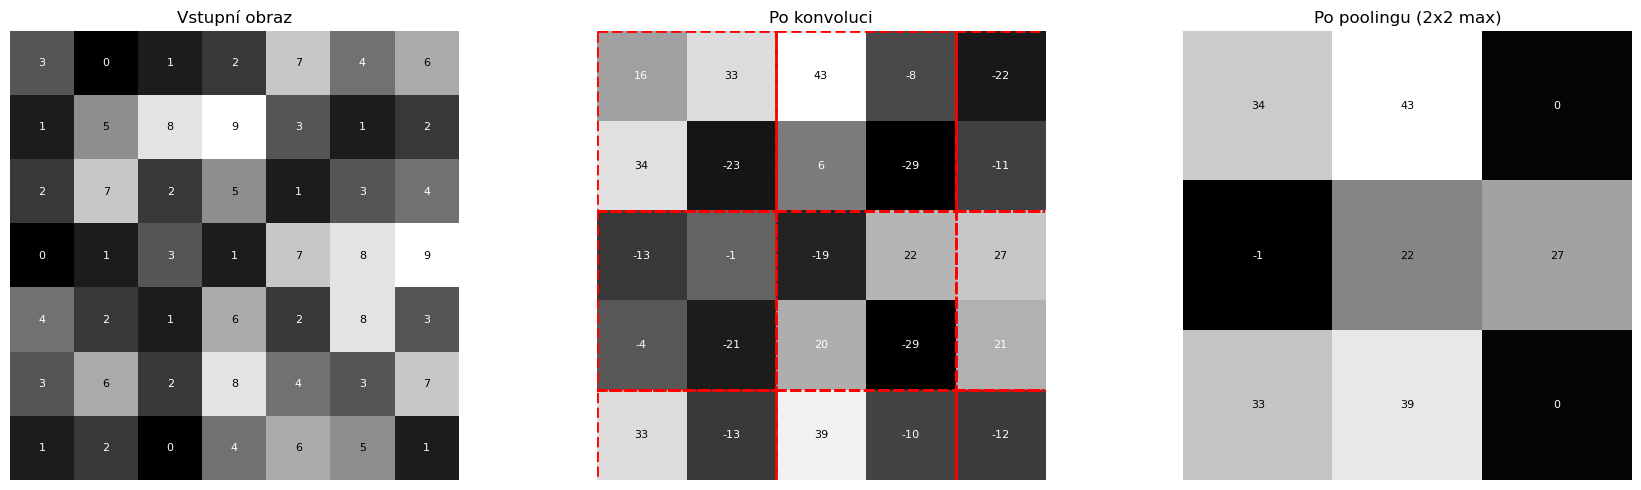

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from skimage.measure import block_reduce

# Vstupní obraz jako 2D matice (např. 7x7)
image = np.array([
    [3, 0, 1, 2, 7, 4, 6],
    [1, 5, 8, 9, 3, 1, 2],
    [2, 7, 2, 5, 1, 3, 4],
    [0, 1, 3, 1, 7, 8, 9],
    [4, 2, 1, 6, 2, 8, 3],
    [3, 6, 2, 8, 4, 3, 7],
    [1, 2, 0, 4, 6, 5, 1]
])

# Konvoluční filtr pro detekci hran
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Konvoluce (bez okrajů)
convolved = scipy.signal.convolve2d(image, kernel, mode='valid')

# Max-pooling 2x2
pooled = block_reduce(convolved, block_size=(2, 2), func=np.max)

# Funkce pro zvýraznění poolingových bloků
def draw_pool_blocks(ax, data, block_size):
    for i in range(0, data.shape[0], block_size[0]):
        for j in range(0, data.shape[1], block_size[1]):
            rect = plt.Rectangle((j - 0.5, i - 0.5), block_size[1], block_size[0],
                                 edgecolor='red', facecolor='none', lw=2, linestyle='--')
            ax.add_patch(rect)

# Funkce pro vypsání hodnot do buněk
def annotate_cells(ax, data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            color = 'white' if data[i, j] < np.max(data) / 2 else 'black'
            ax.text(j, i, f"{data[i, j]:.0f}", va='center', ha='center', color=color, fontsize=8)

# Zobrazení
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Vstupní obraz")
annotate_cells(axs[0], image)
axs[0].axis('off')

axs[1].imshow(convolved, cmap='gray')
axs[1].set_title("Po konvoluci")
draw_pool_blocks(axs[1], convolved, (2, 2))
annotate_cells(axs[1], convolved)
axs[1].axis('off')

axs[2].imshow(pooled, cmap='gray')
axs[2].set_title("Po poolingu (2x2 max)")
annotate_cells(axs[2], pooled)
axs[2].axis('off')

plt.tight_layout()
plt.show()


Konvoluce na reálným obrázku s ukázkou poolingu.

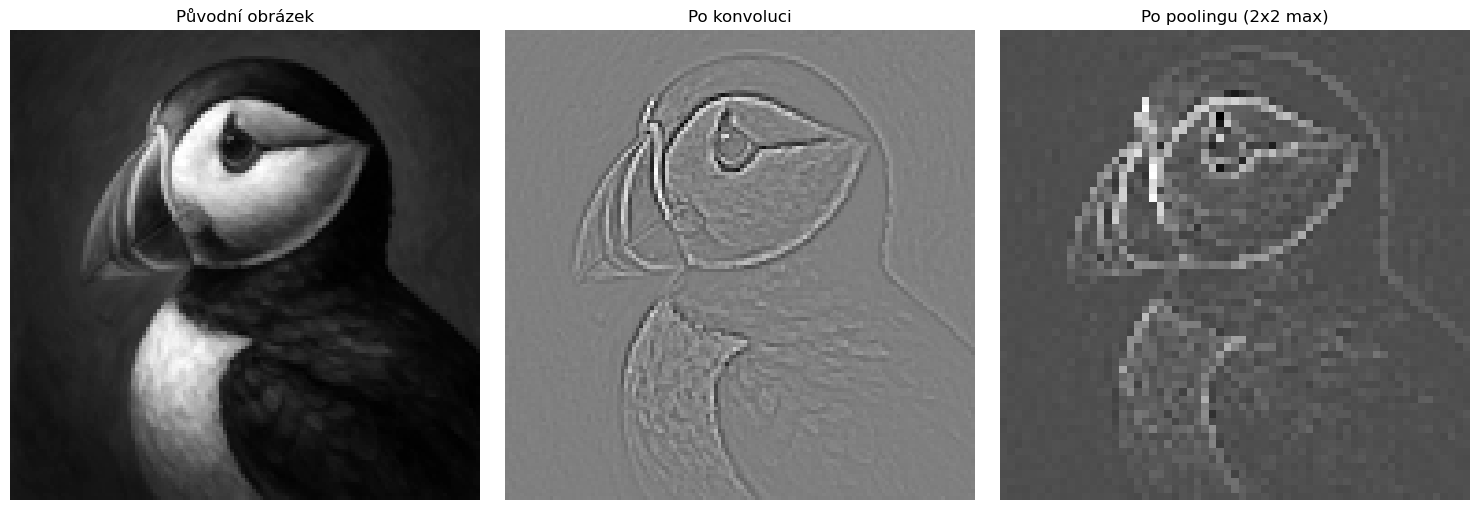

In [9]:

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal
from skimage.measure import block_reduce

# Načtení obrázku z disku (převod na odstíny šedi)
# Nahraď "obrazek.png" názvem svého souboru
image = Image.open("obrazek.png").convert("L")
image = image.resize((128, 128))  # zmenšení kvůli rychlosti
img_array = np.array(image)

# Definice konvolučního filtru (např. zvýraznění hran)
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Aplikace konvoluce
convolved = scipy.signal.convolve2d(img_array, kernel, mode='valid')

# Aplikace 2x2 max-poolingu
pooled = block_reduce(convolved, block_size=(2, 2), func=np.max)

# Zobrazení
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_array, cmap='gray')
axs[0].set_title("Původní obrázek")
axs[1].imshow(convolved, cmap='gray')
axs[1].set_title("Po konvoluci")
axs[2].imshow(pooled, cmap='gray')
axs[2].set_title("Po poolingu (2x2 max)")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, MaxPooling2D, Flatten, Dense, Input
import numpy as np

# 🧪 Simulovaný dataset (100 náhodných 28×28 obrázků)
X = np.random.rand(100, 28, 28, 1).astype(np.float32)
y = np.random.randint(0, 2, 100)

# 🏗️ Model 1: Klasická CNN
classic_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')
])
classic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🧩 Model 2: Optimalizovaná CNN s Depthwise separable convolucí
optimized_model = Sequential([
    Input(shape=(28, 28, 1)),
    DepthwiseConv2D(kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')
])
optimized_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🏋️ Krátké trénování (pro ilustraci)
classic_model.fit(X, y, epochs=3, verbose=0)
optimized_model.fit(X, y, epochs=3, verbose=0)

# 🧾 Porovnání počtu parametrů
print("Počet parametrů (klasická CNN):", classic_model.count_params())
print("Počet parametrů (optimalizovaná CNN):", optimized_model.count_params())


Počet parametrů (klasická CNN): 3297
Počet parametrů (optimalizovaná CNN): 207
